In [1]:
import yaml
import pandas as pd
from utils.data_preprocessor import DataPreprocessor

with open('../config.yaml', 'r') as config_file:
    config = yaml.safe_load(config_file)

training_file_path: str = "../data/indicators (1min)/TSLA_indicators.csv"
training_df = pd.read_csv(training_file_path)

training_preprocessor = DataPreprocessor(training_df)

X = training_preprocessor.X_batched
y = training_preprocessor.y_batched

X_train = training_preprocessor.X_train_scaled
y_train = training_preprocessor.y_train_split
X_val = training_preprocessor.X_validation_scaled
y_val = training_preprocessor.y_validation_split

print("Training Dataset shape:", training_df.shape)
print("Dataset as time series batches:",X.shape, y.shape)
print("Training sets shape:", X_train.shape, y_train.shape)
print("Validation sets shape:", X_val.shape, y_val.shape)


Training Dataset shape: (5000, 13)
Dataset as time series batches: (4970, 20, 21) (4970,)
Training sets shape: (3976, 20, 21) (3976,)
Validation sets shape: (994, 20, 21) (994,)


In [2]:
training_preprocessor.trend_data


,datetime,open,high,low,close,volume,percent_b,macd,macd_signal,macd_hist,adx,ema,rsi,previous open,open-change,open-trend,previous volume,volume-change,volume-trend
0,2023-12-08 13:12:00,241.84,241.95,241.78,241.84,107841,0.77,0.14,0.11,0.02,13.53,241.77,59.08,0.00,0.00,1,0.0,0.0,1
1,2023-12-08 13:13:00,241.85,241.98,241.75,241.94,144413,0.84,0.14,0.12,0.02,13.72,241.80,61.76,0.00,0.00,1,0.0,0.0,1
2,2023-12-08 13:14:00,241.92,242.17,241.92,242.16,269550,0.99,0.16,0.13,0.04,14.64,241.87,66.92,0.00,0.00,1,0.0,0.0,1
3,2023-12-08 13:15:00,242.15,242.44,242.13,242.14,332777,0.91,0.18,0.14,0.04,16.30,241.93,66.02,0.00,0.00,1,0.0,0.0,1
4,2023-12-08 13:16:00,242.15,242.20,242.04,242.14,144412,0.88,0.19,0.15,0.04,17.33,241.97,66.02,0.00,0.00,1,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,2023-12-28 11:57:00,258.98,259.00,258.89,258.95,71964,0.46,-0.05,-0.06,0.02,28.10,258.93,48.66,259.13,-0.15,0,183691.0,-111727.0,0
4996,2023-12-28 11:58:00,258.95,258.98,258.82,258.93,127354,0.41,-0.04,-0.06,0.02,28.00,258.93,47.97,258.95,0.00,0,164062.0,-36708.0,0
4997,2023-12-28 11:59:00,258.95,259.02,258.80,258.87,176862,0.27,-0.04,-0.06,0.01,27.56,258.92,45.88,259.04,-0.09,0,257867.0,-81005.0,0
4998,2023-12-28 12:00:00,258.86,258.90,258.74,258.90,166219,0.33,-0.04,-0.05,0.01,27.45,258.92,47.12,259.03,-0.17,0,564058.0,-397839.0,0


In [3]:
training_preprocessor.target_data


,open,high,low,close,volume,percent_b,macd,macd_signal,macd_hist,adx,...,rsi,previous open,open-change,open-trend,previous volume,volume-change,volume-trend,day_of_week,hour,target
datetime,,,,,,,,,,,,,,,,,,,,,
2023-12-08 13:22:00,242.23,242.36,242.12,242.28,152995,0.88,0.19,0.18,0.01,17.55,...,62.41,241.84,0.39,1,107841.0,45154.0,1,4,13,1
2023-12-08 13:23:00,242.27,242.35,242.26,242.31,83088,0.89,0.19,0.18,0.01,17.45,...,63.16,241.85,0.42,1,144413.0,-61325.0,0,4,13,1
2023-12-08 13:24:00,242.30,242.35,242.20,242.20,103190,0.73,0.19,0.18,0.00,17.03,...,58.90,241.92,0.38,1,269550.0,-166360.0,0,4,13,1
2023-12-08 13:25:00,242.23,242.33,242.10,242.27,181494,0.79,0.18,0.18,0.00,16.13,...,60.72,242.15,0.08,1,332777.0,-151283.0,0,4,13,1
2023-12-08 13:26:00,242.27,242.38,242.26,242.27,145502,0.76,0.18,0.18,-0.00,15.51,...,60.78,242.15,0.12,1,144412.0,1090.0,1,4,13,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-28 11:57:00,258.98,259.00,258.89,258.95,71964,0.46,-0.05,-0.06,0.02,28.10,...,48.66,259.13,-0.15,0,183691.0,-111727.0,0,3,11,1
2023-12-28 11:58:00,258.95,258.98,258.82,258.93,127354,0.41,-0.04,-0.06,0.02,28.00,...,47.97,258.95,0.00,0,164062.0,-36708.0,0,3,11,1
2023-12-28 11:59:00,258.95,259.02,258.80,258.87,176862,0.27,-0.04,-0.06,0.01,27.56,...,45.88,259.04,-0.09,0,257867.0,-81005.0,0,3,11,1


In [4]:
%run ../tests/data_preprocessor_validator.py

.......
----------------------------------------------------------------------
Ran 7 tests in 3.878s

OK


In [5]:
from models.stock_trend_lstm_model import StockTrendLSTMModel

input_shape = (X_train.shape[1], X_train.shape[2])
epochs: int = config["data"]["epochs"]
batch_size: int = config["data"]["batch_size"]
my_model = StockTrendLSTMModel(input_shape, X_train, y_train, X_val, y_val, 100, 32)
history = my_model.train()

Epoch 1/100
125/125 [==============================] - 3s 12ms/step - loss: 0.7478 - accuracy: 0.5030 - val_loss: 0.6799 - val_accuracy: 0.5845
Epoch 2/100
125/125 [==============================] - 1s 8ms/step - loss: 0.7174 - accuracy: 0.5418 - val_loss: 0.6539 - val_accuracy: 0.6841
Epoch 3/100
125/125 [==============================] - 1s 8ms/step - loss: 0.6886 - accuracy: 0.5777 - val_loss: 0.6288 - val_accuracy: 0.7193
Epoch 4/100
125/125 [==============================] - 1s 8ms/step - loss: 0.6537 - accuracy: 0.6255 - val_loss: 0.6022 - val_accuracy: 0.7706
Epoch 5/100
125/125 [==============================] - 1s 8ms/step - loss: 0.6161 - accuracy: 0.6668 - val_loss: 0.5762 - val_accuracy: 0.7968
Epoch 6/100
125/125 [==============================] - 1s 8ms/step - loss: 0.5882 - accuracy: 0.6992 - val_loss: 0.5507 - val_accuracy: 0.7998
Epoch 7/100
125/125 [==============================] - 1s 8ms/step - loss: 0.5647 - accuracy: 0.7299 - val_loss: 0.5269 - val_accuracy: 0.808

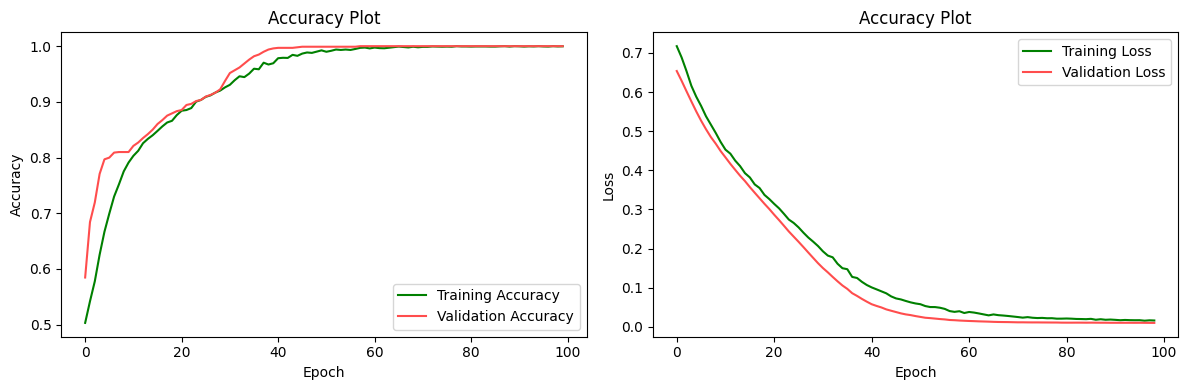

In [6]:
from utils.visualizing_service import plot_model_accuracy
plot_model_accuracy(history)

In [7]:
history.history

{'loss': [0.7477640509605408,
  0.7174146175384521,
  0.6885643601417542,
  0.6537290811538696,
  0.616080641746521,
  0.5882339477539062,
  0.5646591186523438,
  0.5382261872291565,
  0.5169317126274109,
  0.49560409784317017,
  0.4726470410823822,
  0.4528149962425232,
  0.44262394309043884,
  0.42475301027297974,
  0.41078758239746094,
  0.39275217056274414,
  0.38186225295066833,
  0.36405473947525024,
  0.35470256209373474,
  0.33720287680625916,
  0.32647305727005005,
  0.3141721487045288,
  0.30278280377388,
  0.2887747287750244,
  0.2741517126560211,
  0.2654993236064911,
  0.2541605830192566,
  0.24061241745948792,
  0.22811785340309143,
  0.21761378645896912,
  0.20634646713733673,
  0.19290770590305328,
  0.18207670748233795,
  0.17764948308467865,
  0.16113707423210144,
  0.14976336061954498,
  0.14725185930728912,
  0.12752807140350342,
  0.12479222565889359,
  0.11490187048912048,
  0.10682908445596695,
  0.10072501748800278,
  0.09574481844902039,
  0.09065061807632446,
